### 폰트

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as fm

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())


print ('설정파일 위치: ', mpl.matplotlib_fname())


font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list))

font_list

버전:  3.7.1
설치 위치:  /usr/local/lib/python3.10/dist-packages/matplotlib/__init__.py
설정 위치:  /root/.config/matplotlib
캐시 위치:  /root/.cache/matplotlib
설정파일 위치:  /usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/matplotlibrc
29


['/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.t

In [ ]:
# seabron으로 그래프 스타일 설정
import seaborn as sns

"""
아래 5개중 원하는 그래프 스타일 설정.
"""
# sns.set_style('whitegrid')
sns.set_style('darkgrid')
# sns.set_style('dark')
# sns.set_style('white')
# sns.set_style('ticks')

#----------------------------------------------------위 아래가 아예 다른내용이지만, seaborn설정후 폰트적용 셀을 매번 꼭 다시 실행해줘야하기에 셀을 붙여놨습니다.

# matplot으로 한글 font 설정
import matplotlib
import matplotlib.pyplot as plt

# 한글 폰트 사용시 글자를 선명하게
%config InlineBackend.figure_format = 'retina'

# '-' 음수 부호 보이게 설정
matplotlib.rc('axes', unicode_minus=False)

# 한글 폰트 설치
# plt.rc('font', family='NanumBarunGothic')
plt.rc('font', family='NanumGothic')

### 라이브러리 호출

In [1]:
# 연산 처리  패키지
import pandas as pd
import numpy as np

# 전처리 패키지
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 모델 패키지
from xgboost.sklearn import XGBClassifier # from xgboost import XGBClassifier

# 평가지표 패키지
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, mean_squared_error, precision_score, recall_score

# 시각화 패키지
from matplotlib import pyplot as plt
import seaborn as sns

# 그래프 설정
%matplotlib inline

# 경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')

### Data 불러오기

In [2]:
# 코랩 mount
from google.colab import drive
drive.mount('/content/drive')

# 데이터 읽어오기
df = pd.read_csv("/content/drive/MyDrive/기계학습의이해/Dataset/고객별 사고 유무 기본 데이터.csv", encoding = "UTF-8", engine='python')

Mounted at /content/drive


In [3]:
# 유효대수 0, 1인 데이터로만 진행, 그 외의 고정 전처리는 적용하지 않았음
df = df[df['유효대수'] < 2]
df = df.drop(columns = ['유효대수'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188193 entries, 0 to 267775
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   연령대         188193 non-null  float64
 1   성별          188193 non-null  float64
 2   국산차량여부      188000 non-null  float64
 3   직전3년간사고건수   188193 non-null  object 
 4   차량경과년수      188193 non-null  object 
 5   차종          188193 non-null  object 
 6   운전자한정특별약관   188193 non-null  object 
 7   가입경력코드      188193 non-null  float64
 8   차량가입금액      188193 non-null  object 
 9   영상기록장치특약가입  188193 non-null  object 
 10  마일리지약정거리    188193 non-null  object 
 11  사고유무        188193 non-null  int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 18.7+ MB


### Model 함수 정의

In [ ]:
# XGB 회귀 함수
def xgb_classifier(X_train, X_test, y_train, y_test):

    # LogisticRegression 초기화
    model = XGBClassifier(random_state = 33)

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1].reshape(-1,1) # 양성 클래스에 대한 확률 추출

    # 평가지표
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_proba)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)

    return [accuracy, precision, recall, f1, auc, specificity] # optimal_threshold



In [ ]:
# ROC 커브 그리는 함수
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color="red", label="ROC")
    plt.plot([0, 1], [0, 1], color="green", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic Curve")
    plt.legend()
    plt.show()

In [ ]:
# 혼동행렬 시각화
def plot_counfusion_matrix(y_test, y_proba, thereshhold) :

    con_max = confusion_matrix(y_true = y_test,
                               y_pred=(y_proba > thereshhold),
                               labels=[1, 0])
                           # labels=[1, 0] 넣은 이유 :
                           # 0 = Negative, 1 = Positive를 의미하므로
                           # label을 설정하지 않으면 Positive와 Negative가 바뀐 채로 나옴

    sns.heatmap(con_max,
                xticklabels= ['positive','Negative'],
                yticklabels=['True','False'],
                annot=True,
                cbar=False,
                cmap='Blues',
                fmt='g',
                annot_kws={'size':7})
    plt.xlabel('Predict label',fontsize=18)
    plt.ylabel('True label',fontsize=18)

    plt.show()

In [ ]:
# 로지스틱 회귀 시각화
def xgb_visual(X_train, X_test, y_train, y_test):

    # LogisticRegression 초기화
    model = XGBClassifier(random_state = 99)


    # 모델 학습
    model.fit(X_train, y_train)


    # 예측
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1].reshape(-1,1) # 양성 클래스에 대한 확률 추출


    # ROC CURVE 그리기
    print("=============================  ROC CURVE  ====================================\n")
    fper, tper, thresholds = roc_curve(y_test, y_proba)
    plot_roc_curve(fper, tper)
    auc = roc_auc_score(y_test, y_proba)
    print(f"auc : {auc} \n\n")


    # 혼동행렬 출력
    print("================================ MODEL 결과 ================================\n")
    plot_counfusion_matrix(y_test, y_proba, 0.5) # LogisticRegression의 임계값 defalut = 0.5, 모델 튜닝으로 임계값 재설정 불가한듯

    # 평가지표
    print(f"accuracy : {accuracy_score(y_test, y_pred)}")
    print(f"precision : {precision_score(y_test, y_pred)}")
    print(f"recall : {recall_score(y_test, y_pred)}")
    print(f"f1-score : {f1_score(y_test, y_pred, average='weighted')}")

    # 최적 threshold 값 & 그 때의 FPR 출력
    optimal_idx = np.argmax(tper - fper)                 # fpr, tpr 간 차이가 가장 클 때의 index 저장
    print('Optimal threshold:', thresholds[optimal_idx] , '\nOptimal FPR:', fper[optimal_idx], '\n\n')


    # 최적 threshold로 진행할 때의 평가지표
    print("================================ 최적 결과 ================================\n")
    plot_counfusion_matrix(y_test, y_proba, thresholds[optimal_idx])

    y_optpred = (y_proba > thresholds[optimal_idx]).astype(int)

    print(f"accuracy : {accuracy_score(y_test, y_optpred)}")
    print(f"precision : {precision_score(y_test, y_optpred)}")
    print(f"recall : {recall_score(y_test, y_optpred)}")
    print(f"f1-score : {f1_score(y_test, y_optpred, average='weighted')}")
    y_optpred = (y_proba > thresholds[optimal_idx]).astype(int)

    return model

### 데이터셋 생성

In [6]:
# x, y 분리
yn_X = df.drop(columns = ["사고유무"])
yn_y = df["사고유무"]

#### One-Hot encoding

In [7]:
# One-Hot encoding 위해 수치형 변수 문자로 변경
numeric = (yn_X.dtypes == np.float64) | (yn_X.dtypes == np.int64)
numeric_col = yn_X.columns[numeric].tolist()

for col_name in numeric_col:
  yn_X[col_name] = yn_X[col_name].astype(str)

# One-Hot Encoding
yn_dummy_X = pd.get_dummies(yn_X, drop_first = True)

In [8]:
yn_dummy_X

,연령대_10.0,연령대_100.0,연령대_20.0,연령대_30.0,연령대_40.0,연령대_50.0,연령대_60.0,연령대_70.0,연령대_80.0,연령대_90.0,...,차량가입금액_1억이하,차량가입금액_5천만원이하,차량가입금액_미가입,영상기록장치특약가입_미가입,마일리지약정거리_12000K,마일리지약정거리_15000K,마일리지약정거리_3000K,마일리지약정거리_5000K,마일리지약정거리_7000K,마일리지약정거리_미가입
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267768,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
267769,False,False,False,False,True,False,False,False,False,False,...,False,True,False,True,False,True,False,False,False,False
267770,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
267772,False,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,False,False,True,False


#### Label Encoding (수동 순서 반영)

In [9]:
yn_orderlabel_X = yn_X.copy()

# 연령대 수치로 그대로 사용
yn_orderlabel_X['연령대'] = yn_orderlabel_X['연령대'].apply(lambda x: int(str(x).replace(',', '').split('.')[0]))

# 남자는 1, 여자는 0
yn_orderlabel_X['성별'] = yn_orderlabel_X['성별'].apply(lambda x: 1 if int(str(x).replace('.','').split('.')[0]) == 2 else 0)

# 국산은 1, 외제는 0, 결측치는 1
yn_orderlabel_X['국산차량여부'] = yn_orderlabel_X['국산차량여부'].apply(lambda x: 1 if str(x) == "nan" else (0 if int(str(x).replace('.','').split('.')[0]) == 2 else 1))

# 신규 0, 무사고 1, 1회 2, 2회 3, 3회 4, 결측치 0 은 무사고로 편입
yn_orderlabel_X['직전3년간사고건수'] = yn_orderlabel_X['직전3년간사고건수'].apply(lambda x: str(x).replace('0', 'N'))
yn_orderlabel_X['직전3년간사고건수'] = yn_orderlabel_X['직전3년간사고건수'].apply(lambda x: int(str(x).replace('Z', '0').replace('N', '1').replace('D', '2').replace('C', '3').replace('B', '4')))

# 차량 경과년수 길 수록 큰 값 배정
yn_orderlabel_X['차량경과년수'] = yn_orderlabel_X['차량경과년수'].apply(lambda x: int(str(x).replace('신차', '0').replace('5년이하', '1').replace('10년이하', '2').replace('10년이상', '3')))

# 차종 배기량 순으로 클 수록 큰 값 배정
yn_orderlabel_X['차종'] = yn_orderlabel_X['차종'].apply(lambda x: int(str(x).replace('소형A', '0').replace('소형B', '1').replace('중형', '2').replace('대형', '3').replace('다목적1종','4').replace('다목적2종','5').replace('기타','6')))

# 가입경력코드 int로 바꿔 그대로 사용 (7년 이상 : 8)
yn_orderlabel_X['가입경력코드'] = yn_orderlabel_X['가입경력코드'].apply(lambda x: int(str(x).split('.')[0]))

# 차량가입금액 미가입은 0, 이후 금액 클 수록 큰 값 배정
yn_orderlabel_X['차량가입금액'] = yn_orderlabel_X['차량가입금액'].apply(lambda x : int(str(x).replace('미가입','0').replace('5천만원이하','1').replace('1억이하','2').replace('1억이상','3')))

# 영상기록장치 특약 가입 1, 미가입 0
yn_orderlabel_X['영상기록장치특약가입'] = yn_orderlabel_X['영상기록장치특약가입'].apply(lambda x : 1 if str(x)=='가입' else 0)

# 마일리지 약정거리 미가입이 가장 주행거리가 길 것이라 예상, 거리 순으로 값 배정 후 미가입 6 배정
yn_orderlabel_X['마일리지약정거리'] = yn_orderlabel_X['마일리지약정거리'].apply(lambda x: str(x).replace('12000K','4').replace('15000K','5').replace('미가입','6'))
yn_orderlabel_X['마일리지약정거리'] = yn_orderlabel_X['마일리지약정거리'].apply(lambda x: int(str(x).replace('3000K', '0').replace('5000K', '1').replace('7000K', '2').replace('10000K', '3')))

# 운전자한정특별약관 자동 label encoding
le = LabelEncoder()
le = le.fit(yn_orderlabel_X["운전자한정특별약관"])
yn_orderlabel_X["운전자한정특별약관"] = le.transform(yn_orderlabel_X["운전자한정특별약관"])

yn_orderlabel_X

,연령대,성별,국산차량여부,직전3년간사고건수,차량경과년수,차종,운전자한정특별약관,가입경력코드,차량가입금액,영상기록장치특약가입,마일리지약정거리
0,0,0,1,4,0,6,3,8,1,1,5
1,0,0,1,1,0,6,5,8,0,0,5
2,0,0,1,1,0,6,4,5,1,1,6
3,0,0,1,1,3,2,4,2,1,0,5
4,0,0,1,0,1,5,4,1,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...
267768,40,0,1,3,1,1,8,7,0,1,5
267769,40,0,1,3,3,5,6,5,1,0,5
267770,40,0,1,3,1,3,4,7,1,1,6
267772,40,0,1,3,3,2,6,8,0,0,2


### Onehot 100번

In [ ]:
a_acc_list = []
a_pre_list = []
a_recall_list = []
a_f1_list = []
a_specificity_list = []
auc_list = []


for i in range(100):
    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(yn_dummy_X, yn_y,
                                                        test_size = 0.2, stratify = yn_y)

    # sampling
    X_train_temp = X_train.sample(n = 8000)
    y_train_temp = yn_y.loc[X_train_temp.index]

    # model fit
    a = xgb_classifier(X_train_temp, X_test, y_train_temp, y_test)

    # 평가지표 저장
    a_acc_list.append(a[0])
    a_pre_list.append(a[1])
    a_recall_list.append(a[2])
    a_f1_list.append(a[3])
    auc_list.append(a[4])
    a_specificity_list.append(a[5])

    if((i+1)%20 == 0) :
            print(f"{i+1}번째 완료")

# 결과 DataFrame 생성
results = pd.DataFrame({
    'acc' : a_acc_list,
    'prec': a_pre_list,
    'recall': a_recall_list,
    'f1-score' : a_f1_list,
    'specificity' : a_specificity_list,
    'auc' : auc_list
})

# 결과 저장
results.to_csv("/content/drive/MyDrive/기계학습의이해/XGB/XGB최종/결과/XGB_Baseline_Onehot.csv", index = False)

20번째 완료
40번째 완료
60번째 완료
80번째 완료
100번째 완료


### Boxplot

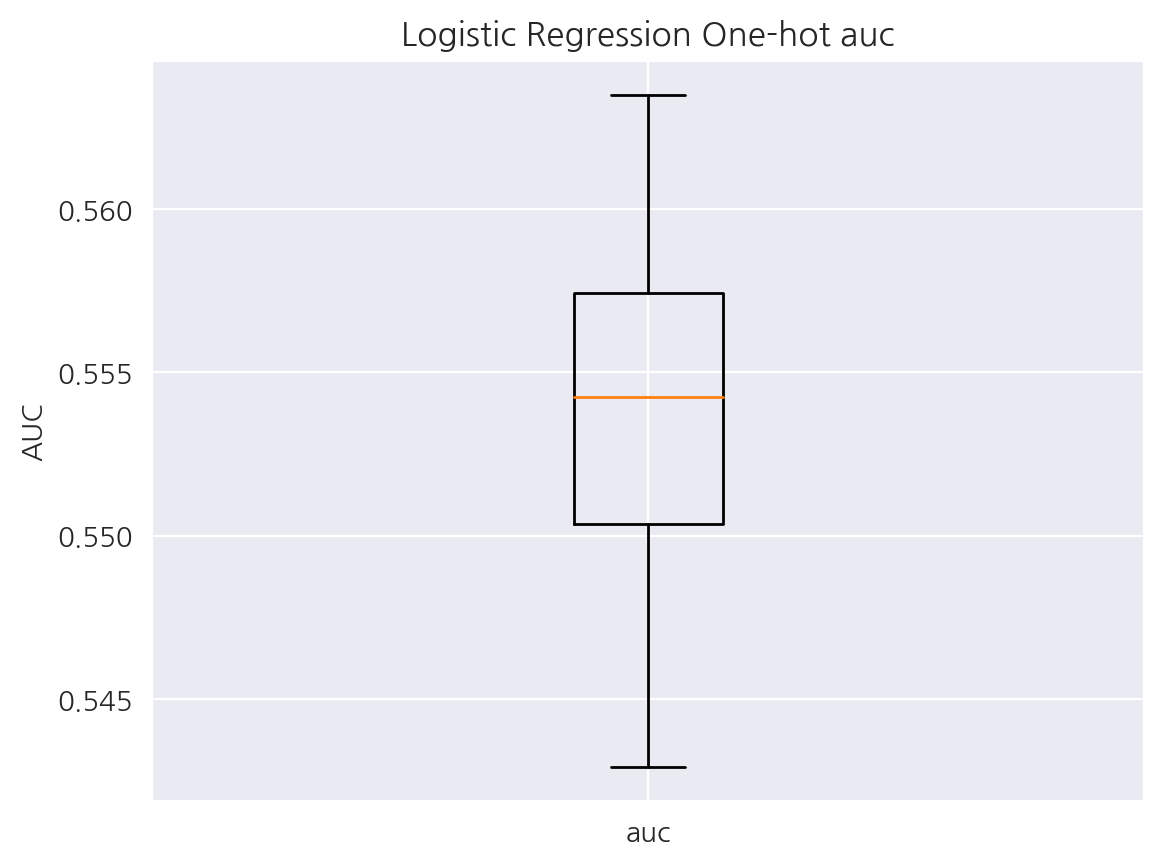

In [ ]:
# boxplot 그리기
plt.boxplot(auc_list)

# 그래프에 레이블 추가
plt.xticks([1], ['auc'])  # x축 레이블 설정
plt.ylabel('AUC')  # y축 레이블 설정
plt.title('Logistic Regression One-hot auc')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

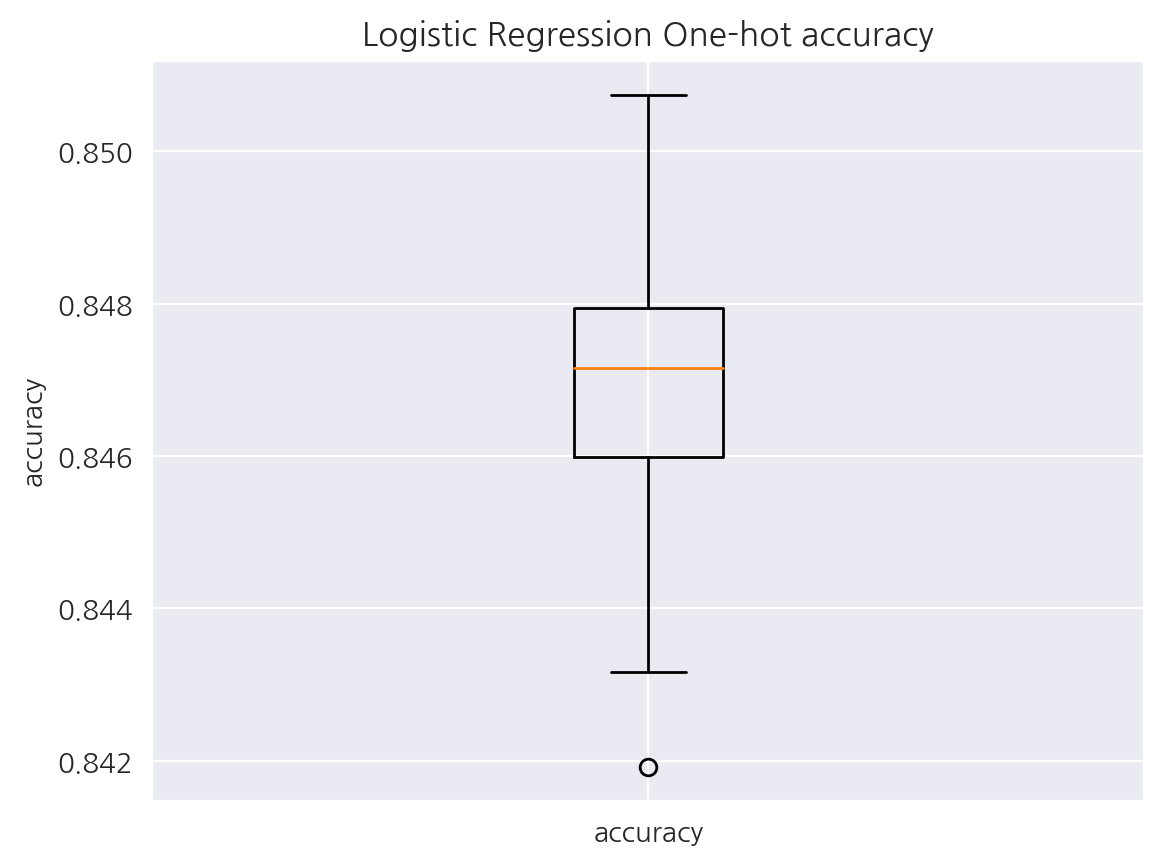

In [ ]:
# boxplot 그리기
plt.boxplot(a_acc_list)

# 그래프에 레이블 추가
plt.xticks([1], ['accuracy'])  # x축 레이블 설정
plt.ylabel('accuracy')  # y축 레이블 설정
plt.title('Logistic Regression One-hot accuracy')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

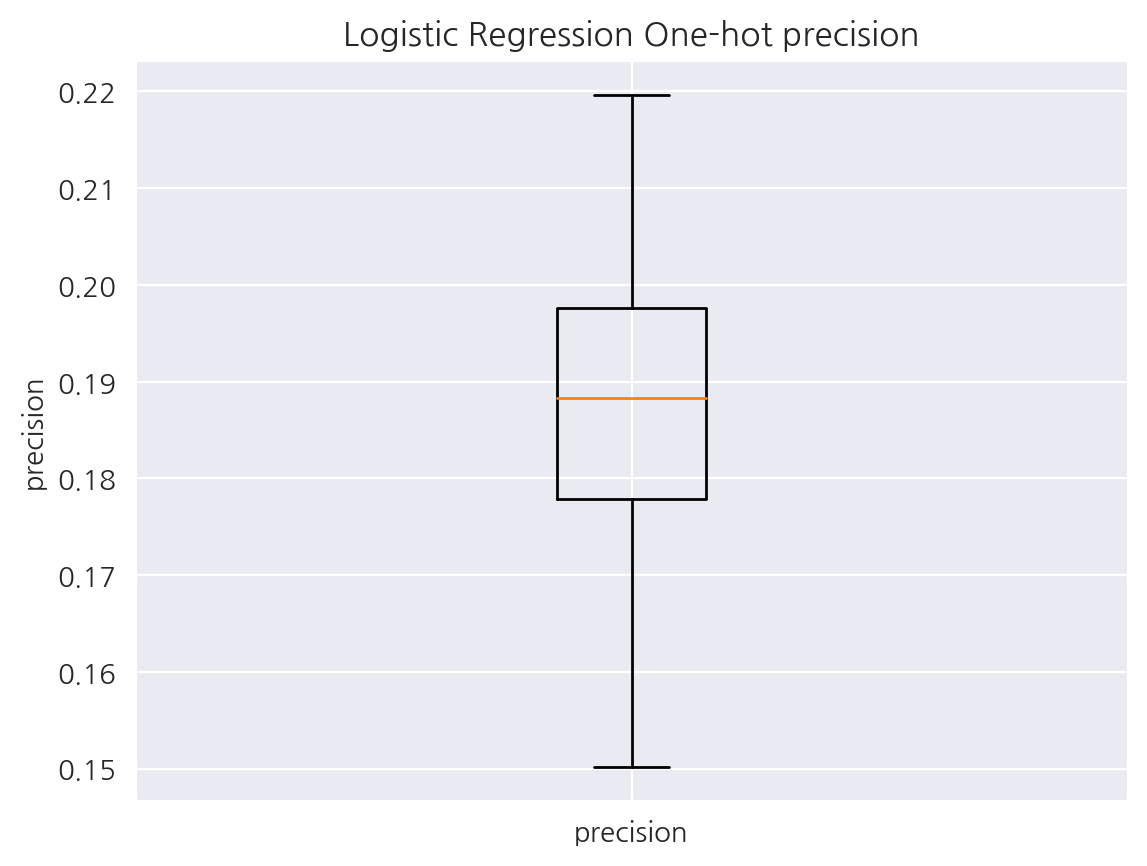

In [ ]:
# boxplot 그리기
plt.boxplot(a_pre_list)

# 그래프에 레이블 추가
plt.xticks([1], ['precision'])  # x축 레이블 설정
plt.ylabel('precision')  # y축 레이블 설정
plt.title('Logistic Regression One-hot precision')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

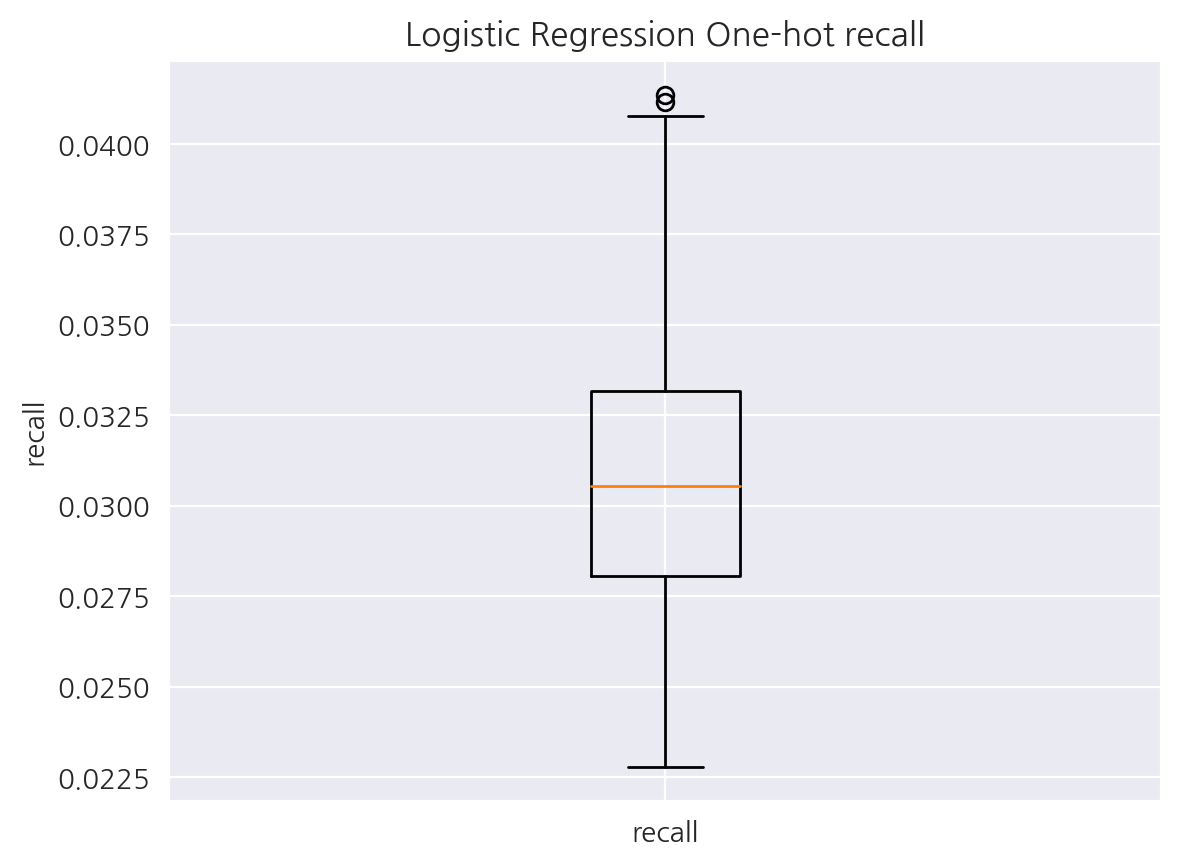

In [ ]:
# boxplot 그리기
plt.boxplot(a_recall_list)

# 그래프에 레이블 추가
plt.xticks([1], ['recall'])  # x축 레이블 설정
plt.ylabel('recall')  # y축 레이블 설정
plt.title('Logistic Regression One-hot recall')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

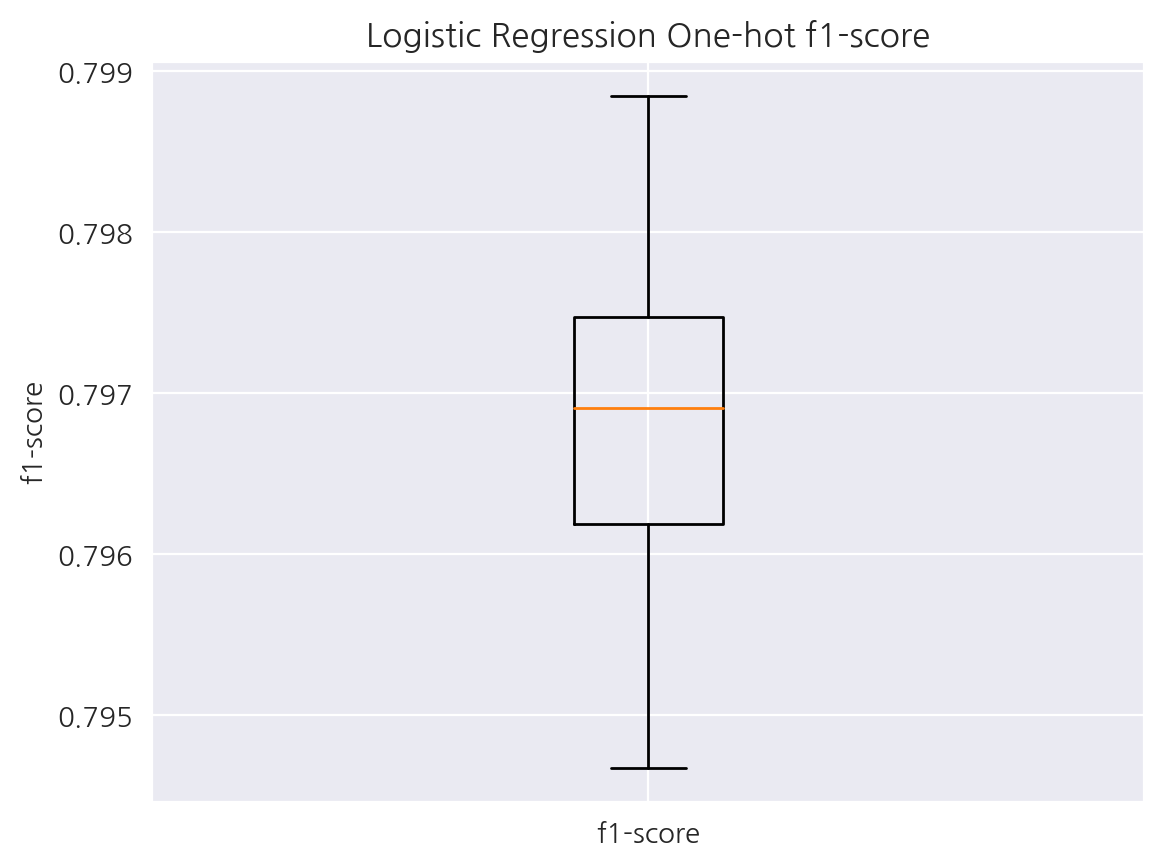

In [ ]:
# boxplot 그리기
plt.boxplot(a_f1_list)

# 그래프에 레이블 추가
plt.xticks([1], ['f1-score'])  # x축 레이블 설정
plt.ylabel('f1-score')  # y축 레이블 설정
plt.title('Logistic Regression One-hot f1-score')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

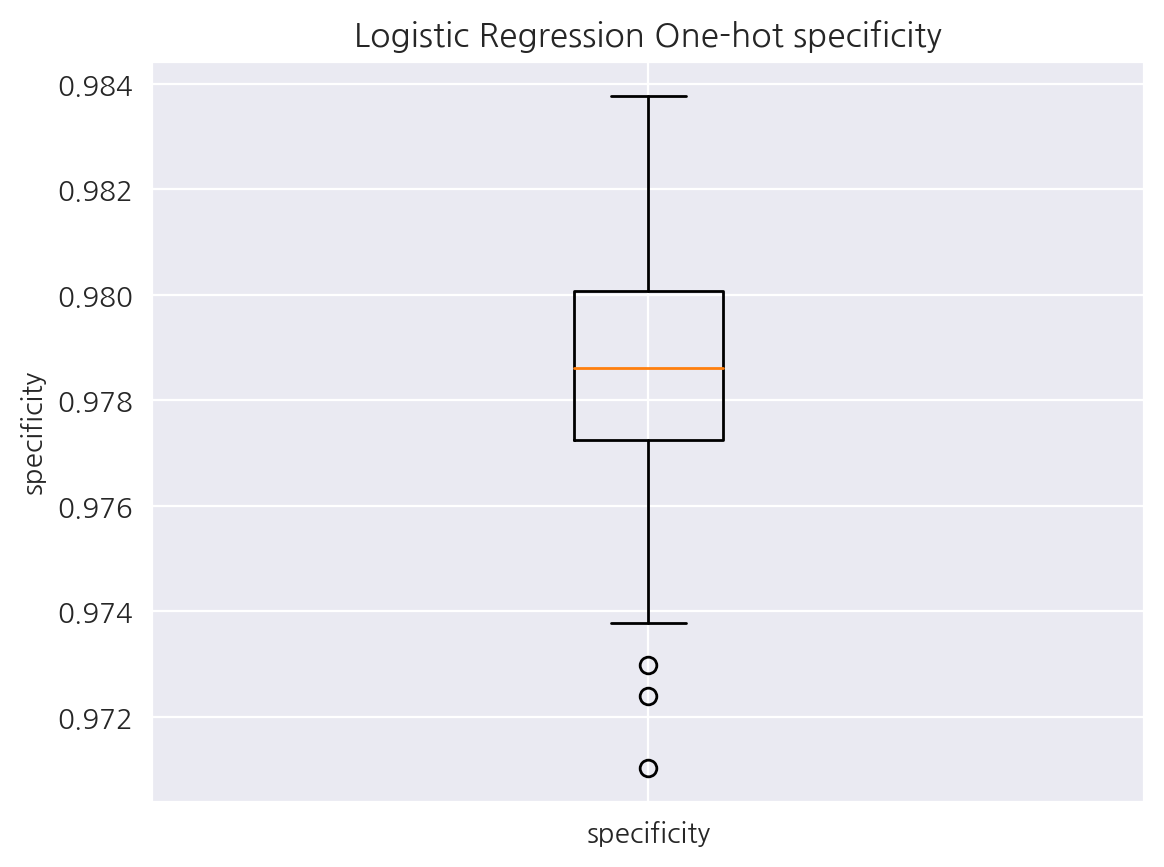

In [ ]:
# 전체 boxplot 그리기
plt.boxplot(a_specificity_list)

# 그래프에 레이블 추가
plt.xticks([1], ['specificity'])  # x축 레이블 설정
plt.ylabel('specificity')  # y축 레이블 설정
plt.title('Logistic Regression One-hot specificity')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

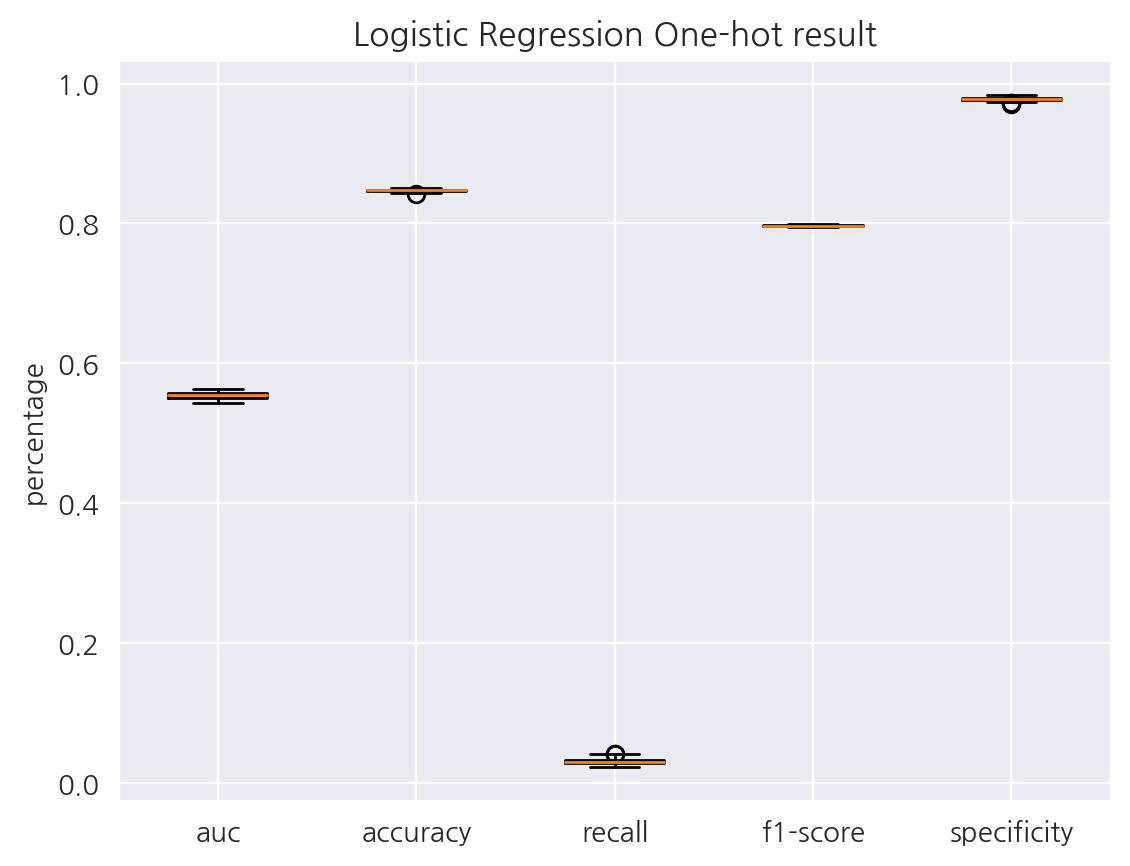

In [ ]:
# 전체 boxplot 그리기
plt.boxplot([auc_list, a_acc_list, a_recall_list, a_f1_list, a_specificity_list])

# 그래프에 레이블 추가
plt.xticks([1, 2, 3, 4, 5], ['auc', 'accuracy', 'recall', 'f1-score', 'specificity'])  # x축 레이블 설정
plt.ylabel('percentage')  # y축 레이블 설정
plt.title('Logistic Regression One-hot result')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

### handled label 100번 반복

In [ ]:
a_acc_list = []
a_pre_list = []
a_recall_list = []
a_f1_list = []
a_specificity_list = []
auc_list = []


for i in range(100):
    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(yn_orderlabel_X, yn_y,
                                                        test_size = 0.2, stratify = yn_y)

    # sampling
    X_train_temp = X_train.sample(n = 8000)
    y_train_temp = yn_y.loc[X_train_temp.index]

    # model fit
    a = xgb_classifier(X_train_temp, X_test, y_train_temp, y_test)

    # 평가지표 저장
    a_acc_list.append(a[0])
    a_pre_list.append(a[1])
    a_recall_list.append(a[2])
    a_f1_list.append(a[3])
    auc_list.append(a[4])
    a_specificity_list.append(a[5])

    if((i+1)%20 == 0) :
            print(f"{i+1}번째 완료")

# 결과 DataFrame 생성
results = pd.DataFrame({
    'acc' : a_acc_list,
    'prec': a_pre_list,
    'recall': a_recall_list,
    'f1-score' : a_f1_list,
    'specificity' : a_specificity_list,
    'auc' : auc_list
})

# 결과 저장
results.to_csv("/content/drive/MyDrive/기계학습의이해/XGB/XGB최종/결과/XGB_Baseline_Label.csv", index = False)

20번째 완료
40번째 완료
60번째 완료
80번째 완료
100번째 완료


### Boxplot

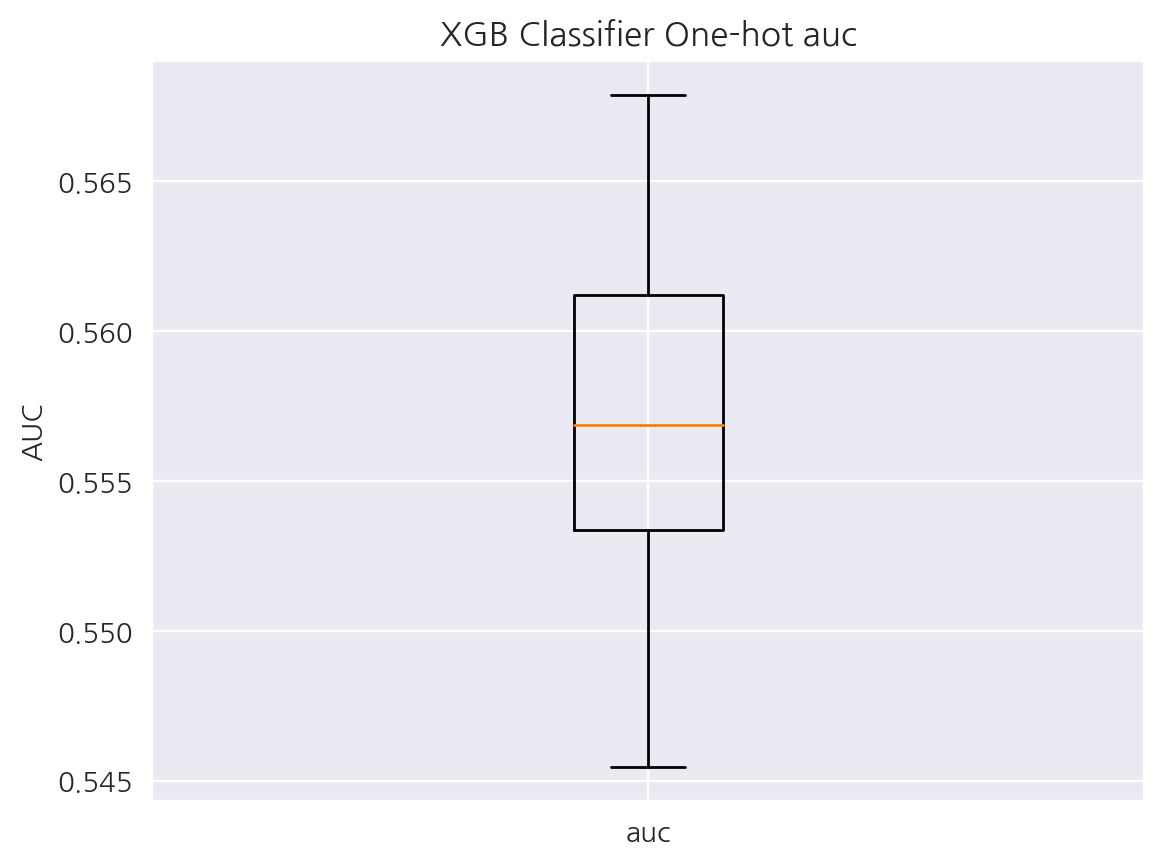

In [ ]:
# boxplot 그리기
plt.boxplot(auc_list)

# 그래프에 레이블 추가
plt.xticks([1], ['auc'])  # x축 레이블 설정
plt.ylabel('AUC')  # y축 레이블 설정
plt.title('XGB Classifier One-hot auc')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

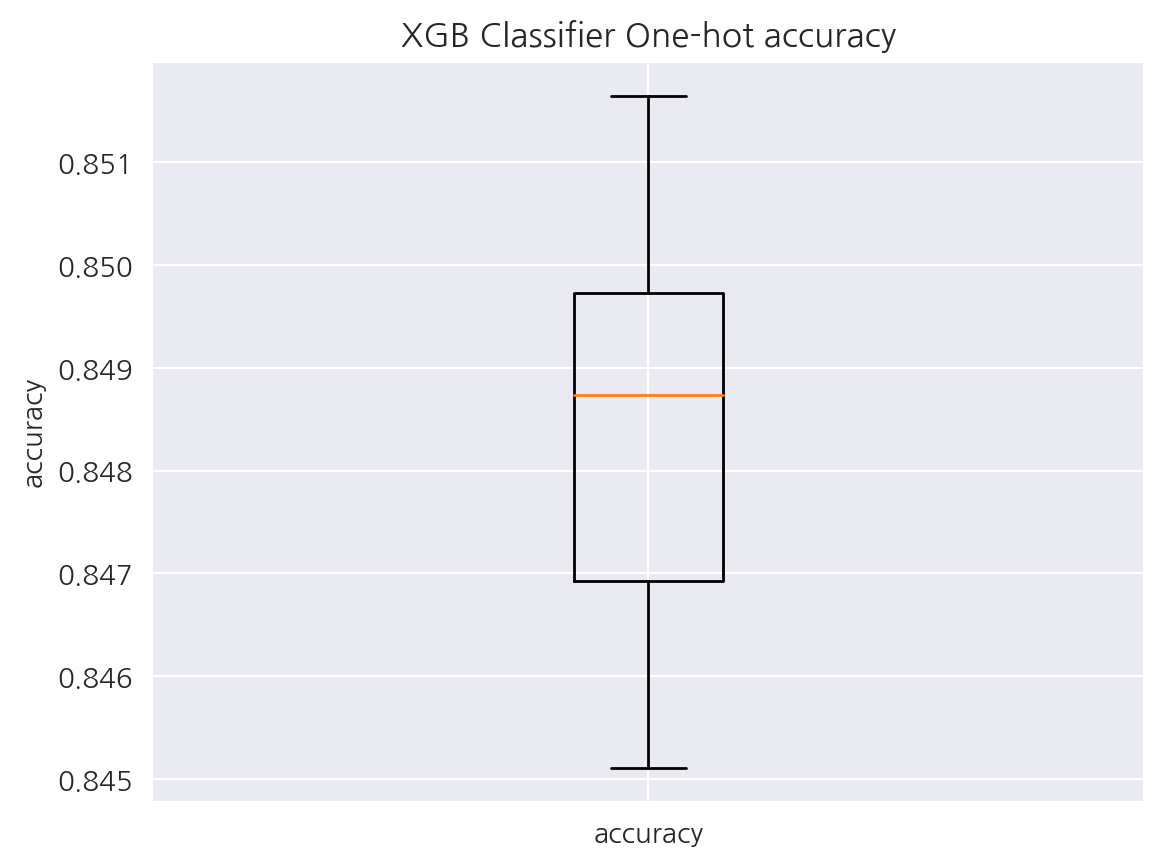

In [ ]:
# boxplot 그리기
plt.boxplot(a_acc_list)

# 그래프에 레이블 추가
plt.xticks([1], ['accuracy'])  # x축 레이블 설정
plt.ylabel('accuracy')  # y축 레이블 설정
plt.title('XGB Classifier One-hot accuracy')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

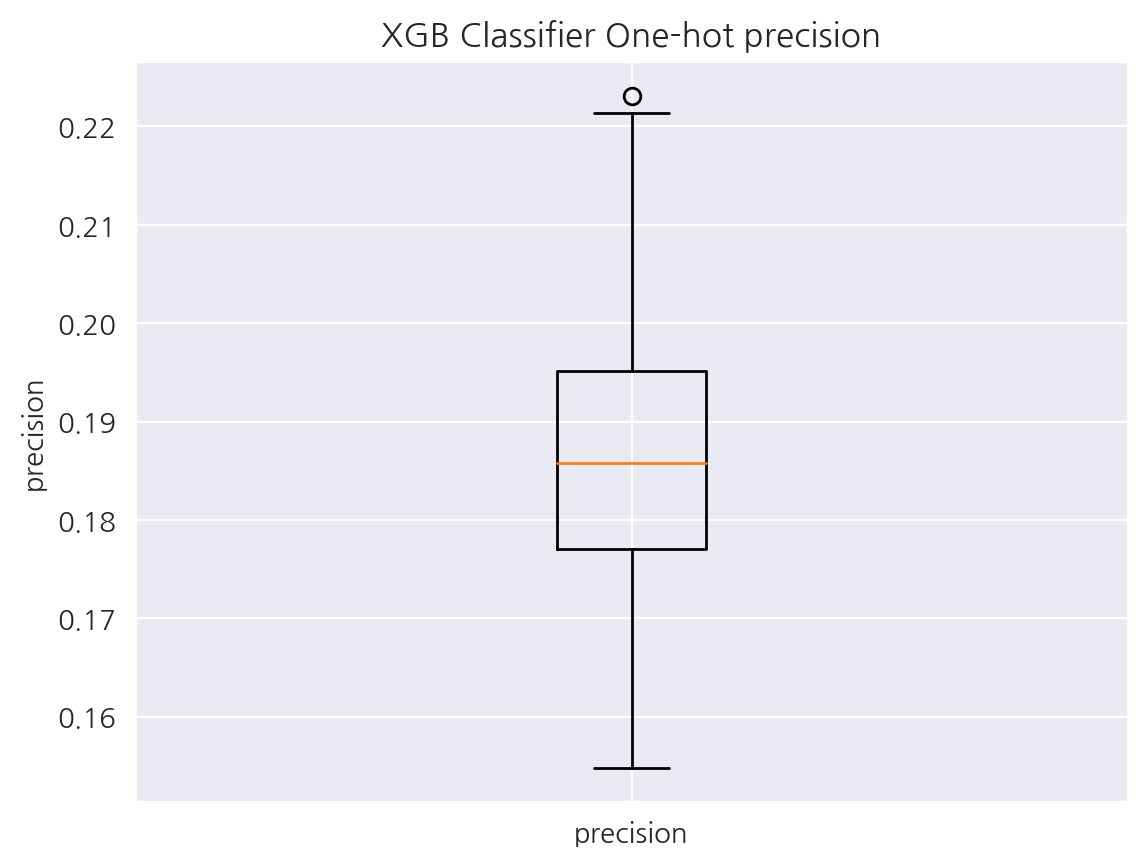

In [ ]:
# boxplot 그리기
plt.boxplot(a_pre_list)

# 그래프에 레이블 추가
plt.xticks([1], ['precision'])  # x축 레이블 설정
plt.ylabel('precision')  # y축 레이블 설정
plt.title('XGB Classifier One-hot precision')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

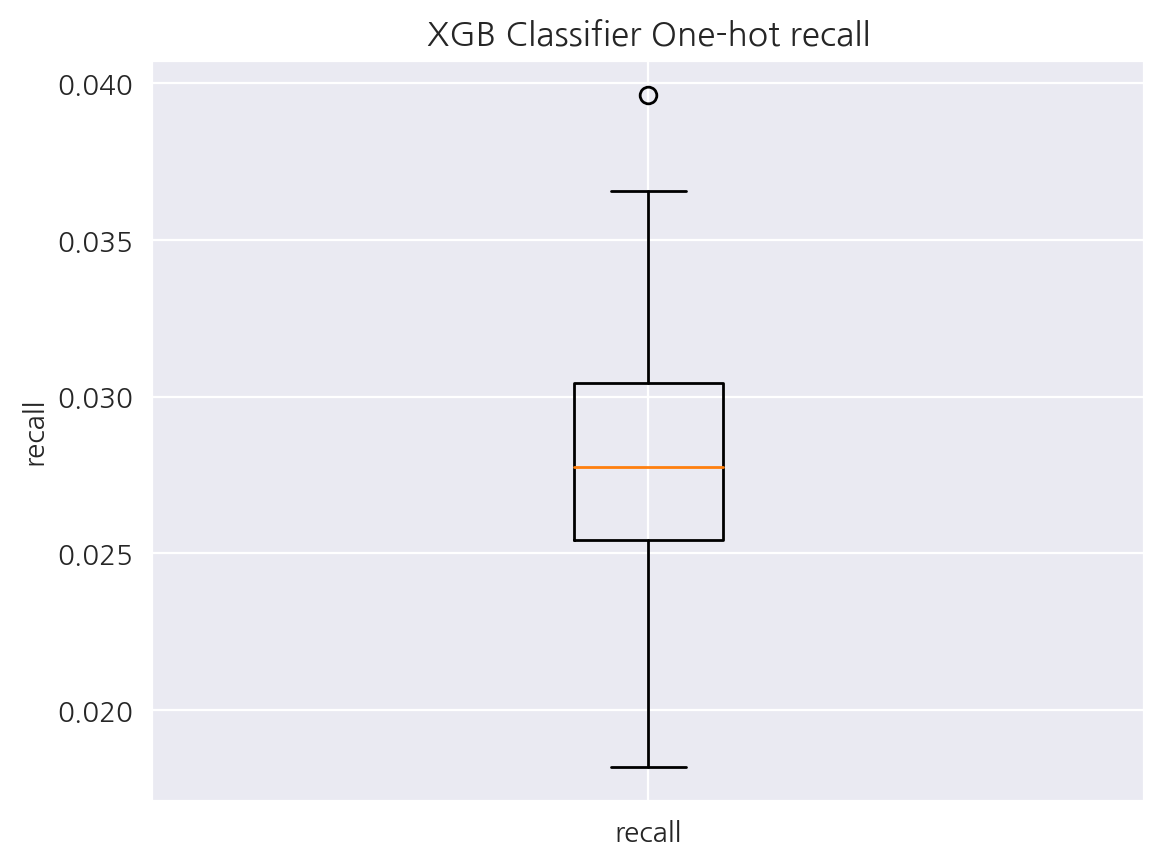

In [ ]:
# boxplot 그리기
plt.boxplot(a_recall_list)

# 그래프에 레이블 추가
plt.xticks([1], ['recall'])  # x축 레이블 설정
plt.ylabel('recall')  # y축 레이블 설정
plt.title('XGB Classifier One-hot recall')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

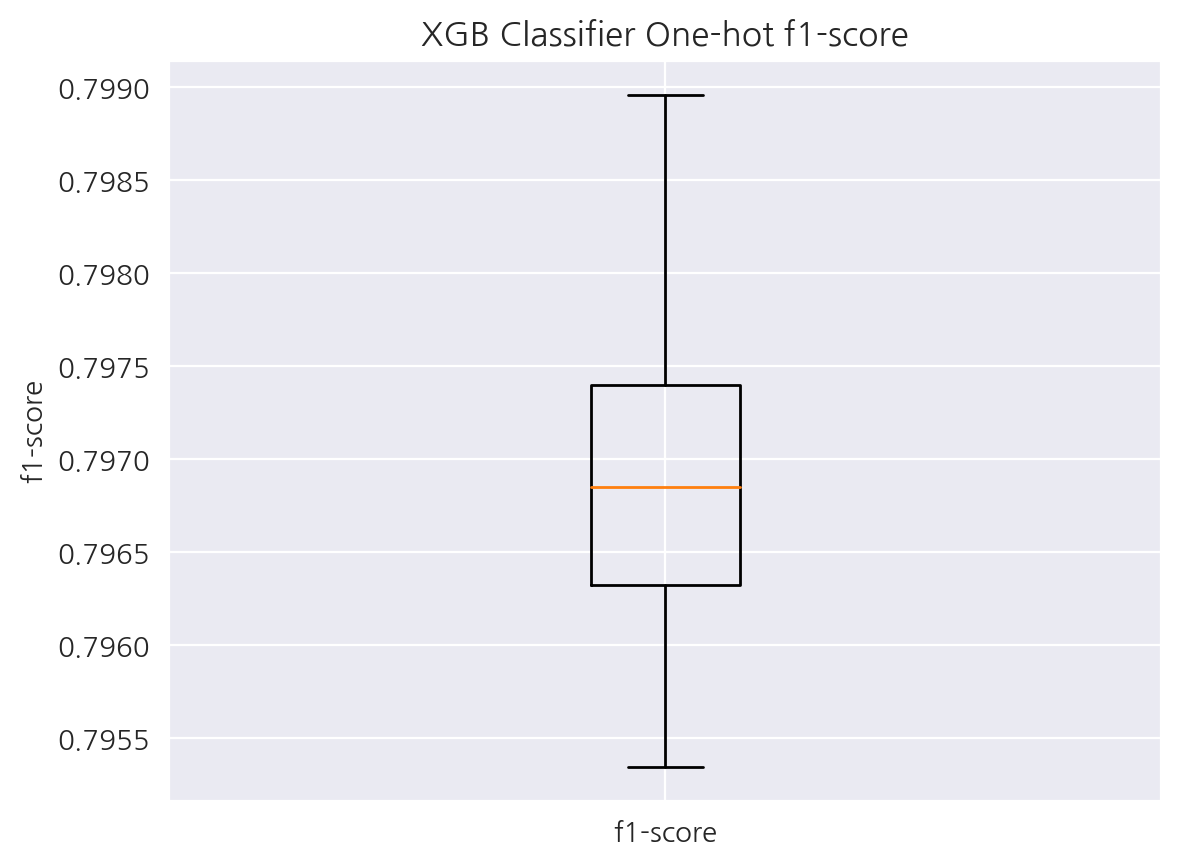

In [ ]:
# boxplot 그리기
plt.boxplot(a_f1_list)

# 그래프에 레이블 추가
plt.xticks([1], ['f1-score'])  # x축 레이블 설정
plt.ylabel('f1-score')  # y축 레이블 설정
plt.title('XGB Classifier One-hot f1-score')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

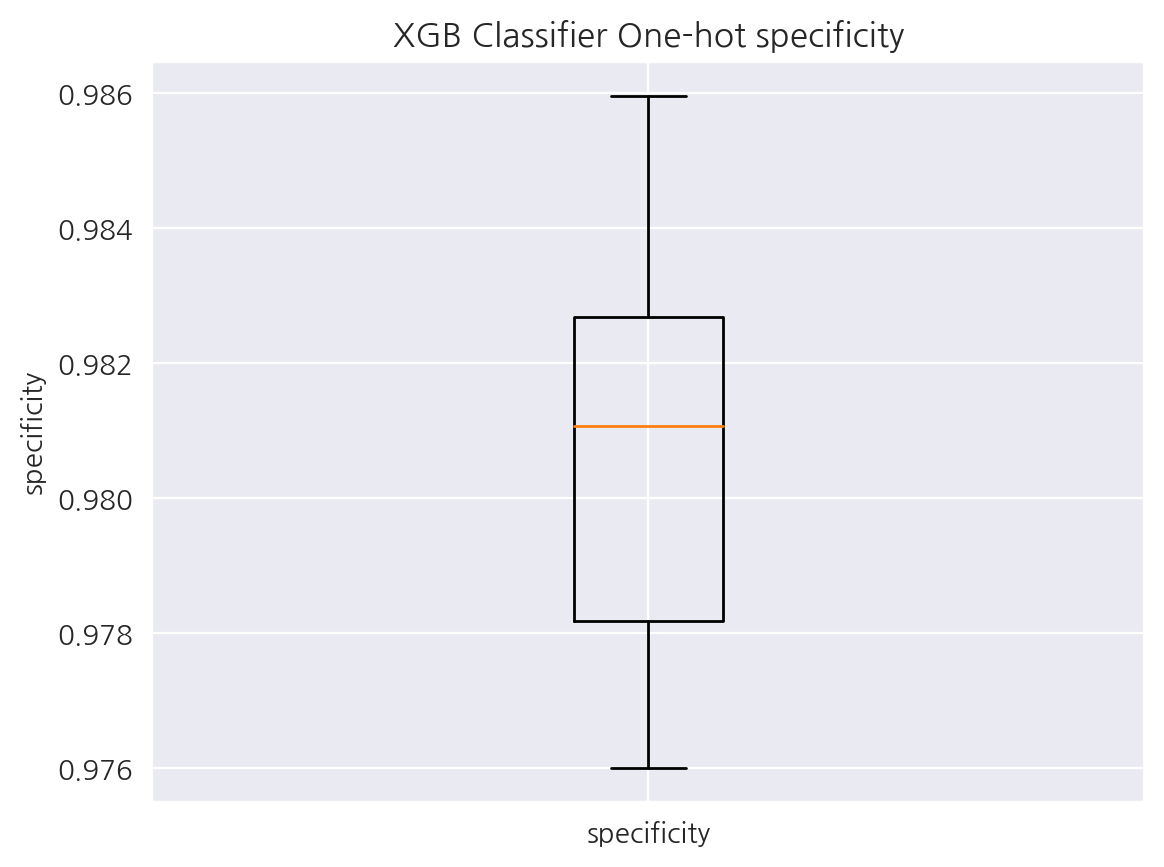

In [ ]:
# 전체 boxplot 그리기
plt.boxplot(a_specificity_list)

# 그래프에 레이블 추가
plt.xticks([1], ['specificity'])  # x축 레이블 설정
plt.ylabel('specificity')  # y축 레이블 설정
plt.title('XGB Classifier One-hot specificity')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

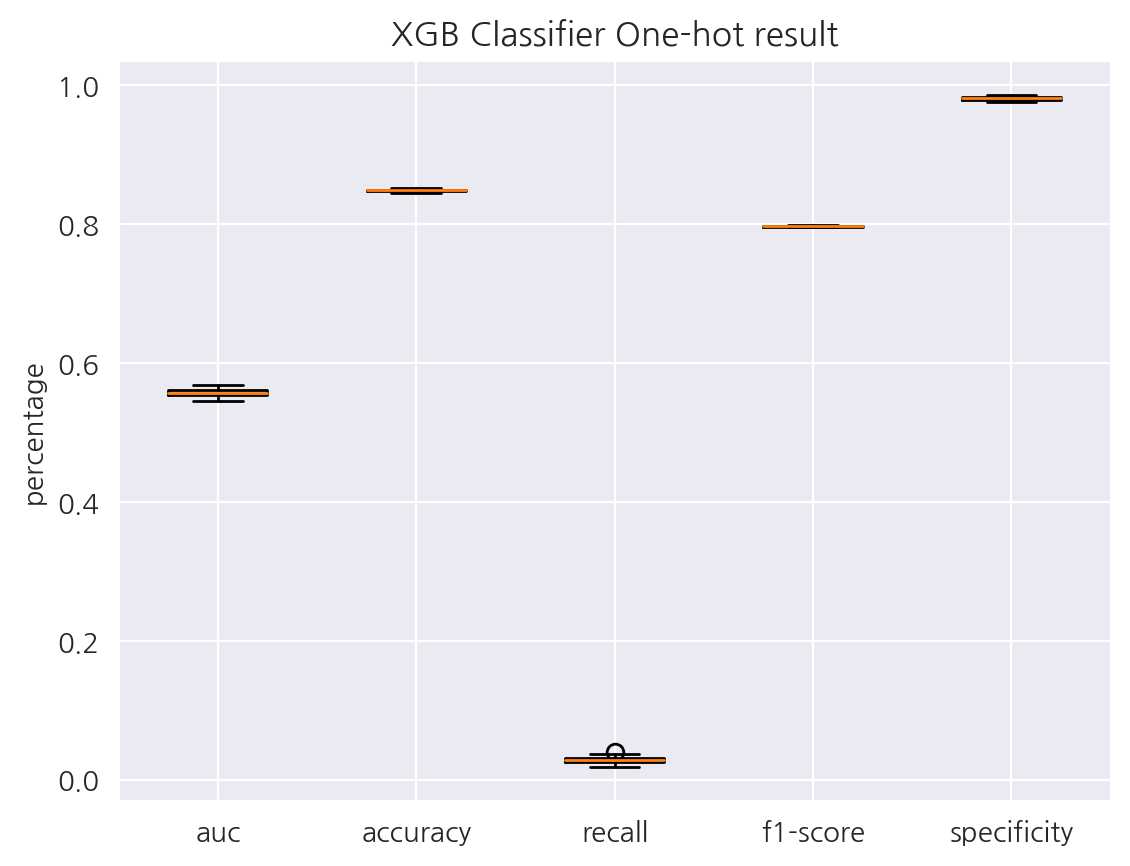

In [ ]:
# 전체 boxplot 그리기
plt.boxplot([auc_list, a_acc_list, a_recall_list, a_f1_list, a_specificity_list])

# 그래프에 레이블 추가
plt.xticks([1, 2, 3, 4, 5], ['auc', 'accuracy', 'recall', 'f1-score', 'specificity'])  # x축 레이블 설정
plt.ylabel('percentage')  # y축 레이블 설정
plt.title('XGB Classifier One-hot result')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

### test

In [15]:
# xgb test 함수
def xgb_test(X_train, X_test, y_train, y_test):

    # # smote 전 data type 변환
    # bool_mask = X_train.dtypes == np.bool_
    # bool_cols = X_train.columns[bool_mask].tolist()

    # for col_name in bool_cols:
    #     X_train[col_name] = X_train[col_name].astype(int)
    #     X_test[col_name] = X_test[col_name].astype(int)

    # # SMOTE oversampling
    # smt = SMOTE(sampling_strategy = 'auto')
    # X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

    # LogisticRegression 초기화
    model = XGBClassifier(
            # n_estimators = 300,
            # learning_rate = 0.1,
            # max_depth = 9,
            # gamma = 0,
            # colsample_bytree = 0.8,
            random_state = 33
        )

    # 모델 학습
    model.fit(X_train, y_train)

    # 테스트 데이터셋에 대한 예측 수행
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # 기본 평가지표
    auc = roc_auc_score(y_test, y_proba)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)

    # Optimal thr 저장
    fper, tper, thresholds = roc_curve(y_test, y_proba)
    optimal_idx = np.argmax(tper - fper)   # fpr, tpr 간 차이가 가장 클 때의 index 저장
    thres_value = thresholds[optimal_idx]

    # 최적 threshold 평가지표
    y_optpred = (y_proba > thres_value).astype(int)

    opt_accuracy = accuracy_score(y_test, y_optpred)
    opt_precision = precision_score(y_test, y_optpred)
    opt_recall = recall_score(y_test, y_optpred)
    opt_f1 = f1_score(y_test, y_optpred, average='weighted')

    tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_optpred).ravel()
    opt_specificity = tn2 / (tn2 + fp2)

    return auc, accuracy, recall, precision, f1, specificity, opt_accuracy, opt_recall, opt_precision, opt_f1, opt_specificity, y_proba, y_optpred

In [17]:
rows = len(df)

# 행 개수의 절반을 계산하고 정수로 변환
half_rows = rows // 2

# 데이터프레임을 절반으로 나누기 - onehot
train_df = yn_dummy_X.iloc[:half_rows]
test_df = yn_dummy_X.iloc[half_rows:]

print("trainset 데이터 갯수: ",len(train_df))
print("testset 데이터 갯수: ", len(test_df))


# y값 비율 잘 섞였는지 확인 -> 필요한가? 일단 비율은 비슷함
print("\n========train set y값 비율==============")
print(train_df['사고유무'].value_counts())
print("========test set y값 비율==============")
print(test_df['사고유무'].value_counts())

trainset 데이터 갯수:  94096
testset 데이터 갯수:  94097

========train set y값 비율==============


KeyError: '사고유무'

In [12]:
# train X, y 데이터셋 만들기
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

X_train = train_df.drop(columns=['사고유무'])
y_train = train_df['사고유무']

In [13]:
# test data 생성
test_dfs = []
for i in range(100):
    # 각 반복마다 다른 랜덤 시드 설정 0~99
    np.random.seed(i)

    # 데이터프레임에서 임의의 10000개 행 추출
    sample_df = test_df.sample(n=10000)

    # 결과 확인
    test_dfs.append(sample_df)

In [14]:
# 모델 학습  & test 결과

auc = []

acc = []
prec = []
rec = []
f1 = []
spec = []

optacc = []
optprec = []
optrec = []
optspec = []
optf1 = []

for i in range(100):

    train = train_df # .sample(n=10000).reset_index(drop=True) # train set 은 걍 데이터 뽑으면 됩니다
    test = test_dfs[i].reset_index(drop=True)

    X_train = train.drop(columns = ['사고유무'], axis = 1)
    y_train = train['사고유무']

    X_test = test.drop(columns = ['사고유무'], axis = 1)
    y_test = test['사고유무']

    aucc, accuracy, recall, precision, f1_sc, specificity, opt_accuracy, opt_recall, opt_precision, opt_f1_sc, opt_specificity, y_proba, y_optpred = xgb_test(X_train, X_test, y_train, y_test)

    test_rst = pd.DataFrame({'y_hat' : y_optpred, 'y_proba' : y_proba})
    test_rst.to_csv(f"/content/drive/MyDrive/기계학습의이해/XGB/XGB최종/결과/XGB_TEST33/output{i}.csv", index = False)

    auc.append(aucc)
    acc.append(accuracy)
    prec.append(precision)
    rec.append(recall)
    f1.append(f1_sc)
    spec.append(specificity)

    optacc.append(opt_accuracy)
    optprec.append(opt_precision)
    optrec.append(opt_recall)
    optf1.append(opt_f1_sc)
    optspec.append(opt_specificity)

    if((i+1) % 10 == 0):
        print(f"{(i+1)}% 완료")

# 결과 DataFrame 생성
results = pd.DataFrame({
    'auc' : aucc,
    'accuracy' : acc,
    'precision' : prec,
    'recall' : rec,
    "f1-score" : f1,
    "specificity" : spec,
    'opt_accuracy' : optacc,
    'opt_precision' : optprec,
    'opt_recall' : optrec,
    "opt_f1-score" : optf1,
    "opt_specificity" : optspec
})


# csv 저장
results.to_csv(f"/content/drive/MyDrive/기계학습의이해/XGB/XGB최종/결과/XGB_test_평가지표3.csv", index = False)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:직전3년간사고건수: object, 차량경과년수: object, 차종: object, 운전자한정특별약관: object, 차량가입금액: object, 영상기록장치특약가입: object, 마일리지약정거리: object

In [ ]:
# boxplot 그리기
plt.boxplot(results['auc'])

# 그래프에 레이블 추가
plt.xticks([1], ['auc'])  # x축 레이블 설정
plt.ylabel('AUC')  # y축 레이블 설정
plt.title('XGBClassifier AUC Result')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

In [ ]:
# boxplot 그리기
plt.boxplot(results['opt_accuracy'])

# 그래프에 레이블 추가
plt.xticks([1], [f'threshold = {thres_value}'])  # x축 레이블 설정
plt.ylabel('accuracy')  # y축 레이블 설정
plt.title('XGBClassifier Accuracy Result')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

In [ ]:
# boxplot 그리기
plt.boxplot(results['opt_precision'])

# 그래프에 레이블 추가
plt.xticks([1], [f'threshold = {thres_value}'])  # x축 레이블 설정
plt.ylabel('precision')  # y축 레이블 설정
plt.title('XGBClassifier Precision Result')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

In [ ]:
# boxplot 그리기
plt.boxplot(results['opt_recall'])

# 그래프에 레이블 추가
plt.xticks([1], [f'threshold = {thres_value}'])  # x축 레이블 설정
plt.ylabel('recall')  # y축 레이블 설정
plt.title('XGBClassifier Recall Result')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

In [ ]:
# boxplot 그리기
plt.boxplot(results['opt_specificity'])

# 그래프에 레이블 추가
plt.xticks([1], [f'threshold = {thres_value}'])  # x축 레이블 설정
plt.ylabel('specificity')  # y축 레이블 설정
plt.title('XGBClassifier Specificity Result')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

In [ ]:
# 전체 boxplot 그리기
plt.boxplot([results['auc'], results['opt_accuracy'], results['opt_recall'], results['opt_precision'], results['opt_specificity']])

# 그래프에 레이블 추가
plt.xticks([1, 2, 3, 4, 5], ['auc', 'accuracy', 'recall', 'precision', 'specificity'])  # x축 레이블 설정
plt.ylabel('percentage')  # y축 레이블 설정
plt.title('XGBClassifier total result')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()